# Overview of Deep Learning Using PyTorch

In [10]:
import torch

### • Size
### • Storage
### • Offset
### • Stride

In [11]:
A = [[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]]

In [12]:
points = torch.tensor(A)

In [21]:
print(points[0], points[1], points[2])

tensor([1., 4.]) tensor([2., 1.]) tensor([3., 5.])


In [22]:
points[0][0]

tensor(1.)

In [40]:
points.storage()

 1.0
 4.0
 2.0
 1.0
 3.0
 5.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 6]

In [13]:
points.size()

torch.Size([3, 2])

In [15]:
points.shape

torch.Size([3, 2])

In [17]:
points.storage_offset()

0

The offset here represents the index of the first element of the tensor in the storage array. Because the output is 0, it means that the first element of the tensor is the first element in the storage array.

In [19]:
points[1].storage_offset()

2

In [26]:
points.stride()

(2, 1)

• torch.float32 or torch.float—32-bit floating-point

• torch.float64 or torch.double—64-bit, double-precision floating-point 

• torch.float16 or torch.half—16-bit, half-precision floating-point

• torch.int8—Signed 8-bit integers

• torch.uint8—Unsigned 8-bit integers

• torch.int16 or torch.short—Signed 16-bit integers

• torch.int32 or torch.int—Signed 32-bit integers

• torch.int64 or torch.long—Signed 64-bit integers

### วิธีบอก type ให้ tensor

In [ ]:
points = torch.tensor(A, dtype= torch.float32)

In [30]:
points.dtype

torch.float32

### Besides the data type, tensors in PyTorch also need a device specification where they will be stored. A device can be specified as instantiation:

In [31]:
points = torch.tensor(A, dtype= torch.float32, device= 'cpu')

In [32]:
points.device

device(type='cpu')

In [ ]:
# points_2 = points.to(device= "cuda")

### If there are multiple devices of the same type, say more than one GPU, we can precisely locate the device we want to place the tensor in using the device index, such as the following:

In [33]:
# points_3 = points.to(device= "cuda:0")

# PyTorch modules

• torch.nn / torch.nn.functional

• torch.optim

• torch.utils.data
    
    

# torch.nn 

The PyTorch nn module enables users to quickly instantiate neural network architectures by defining some of these high-level aspects as opposed to having to specify all the details manually. The following is a one-layer neural network initialization without using the nn module:

In [ ]:
import math
'''we assume a 256-dimensional input and a 4-dimensional 
output for this 1-layer neural network
hence, we initialize a 256x4 dimensional matrix 
filled with random values'''
weights = torch.randn(256, 4) / math.sqrt(256)
'''we then ensure that the parameters of this neural network are 
trainable, that is, the numbers in the 256x4 matrix 
can be tuned with the help of backpropagation of gradients''' 
weights.requires_grad_()
'''finally we also add the bias weights for the 
4-dimensional output, and make these trainable too'''
bias = torch.zeros(4, requires_grad=True)

We can instead use nn.Linear(256, 4) to represent the same thing.

Within the torch.nn module, there is a submodule called torch.nn.functional. This submodule consists of all the functions within the torch.nn module, whereas all the other submodules are classes. These functions are loss functions, activating functions, and also neural functions that can be used to create neural networks in a functional manner (that is, when each subsequent layer is expressed as a function of the previous layer) such as pooling, convolutional, and linear functions. 

In [34]:
import torch.nn.functional as F
loss_func = F.cross_entropy
# loss = loss_func(model(X),y)  # X is the input, y is the target output

# torch.optim

Let’s say we define an optimizer during a training session using the torch.optim modules, as shown in the following snippet:

In [ ]:
import torch.optim as optim

opt = optim.SGD(model.parameters(), lr=lr)

Then, we don’t need to manually write the optimization step as shown here:

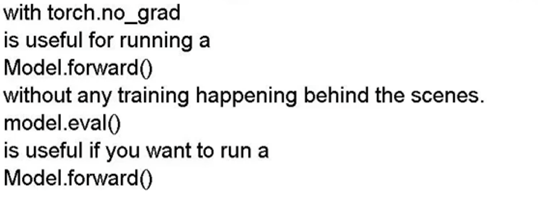
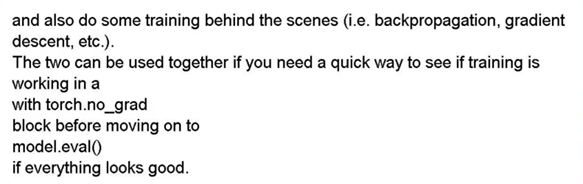

In [ ]:
with torch.no_grad():
    # applying the parameter updates using stochastic gradient descent
    for param in model.parameters(): 
        param -= param.grad * lr
    model.zero_grad()

We can simply write this instead:

In [ ]:
opt.step() 
opt.zero_grad()

# torch.utils.data

Torch provides its own dataset and DataLoader classes,

let’s say we use torch.utils.data.DataLoader as follows:

In [ ]:
from torch.utils.data import (TensorDataset, DataLoader) 
train_dataset = TensorDataset(x_train, y_train) 
train_dataloader = DataLoader(train_dataset, batch_size=bs)

Then, we don’t need to iterate through batches of data manually, like this:

In [ ]:
for i in range((n-1)//bs + 1): 
    x_batch = x_train[start_i:end_i]
    y_batch = y_train[start_i:end_i] 
    pred = model(x_batch)

We can simply write this instead:

In [ ]:
for x_batch,y_batch in train_dataloader:
    pred = model(x_batch)

# Training a neural network using PyTorch

# 1. imports

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# 2. model architectures

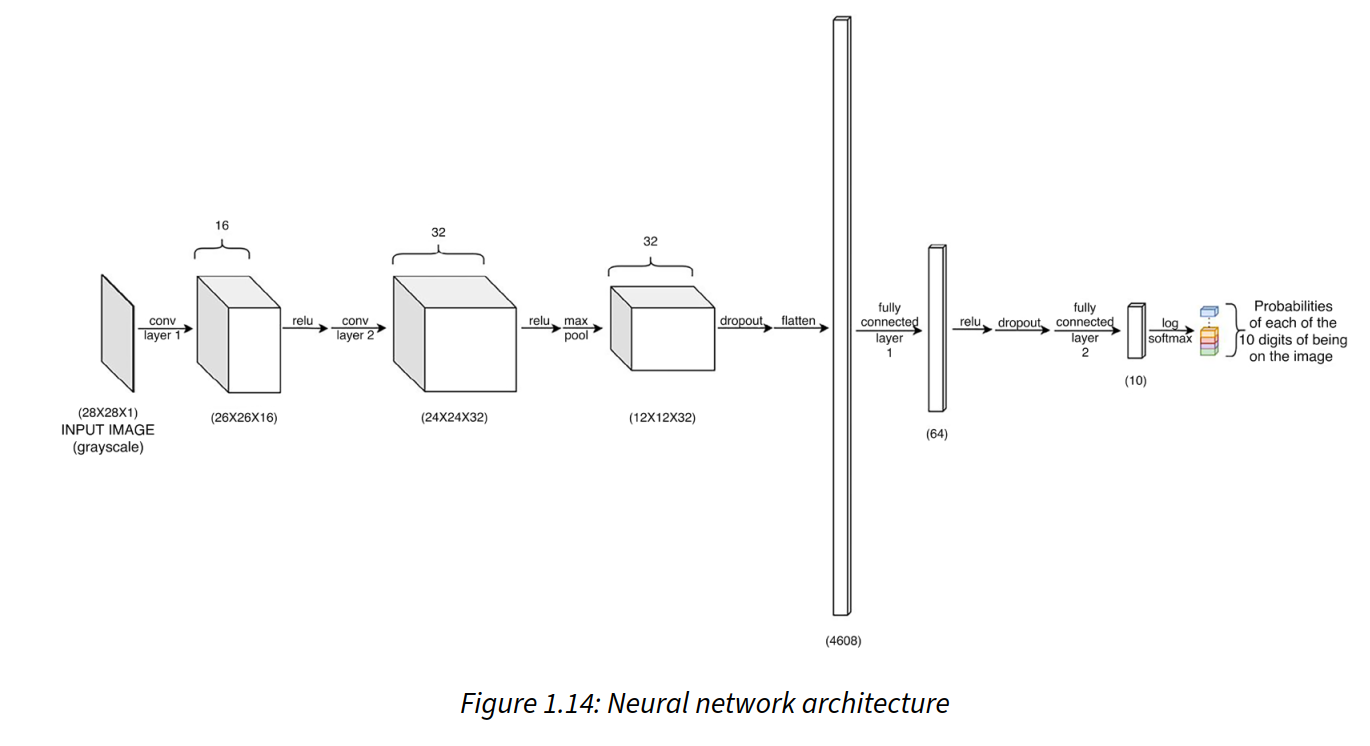

The model consists of convolutional layers, dropout layers, as well as linear/fully connected 
layers, all available through the torch.nn module:

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.cn1 = nn.Conv2d(1,16,3,1)
        self.cn2 = nn.Conv2d(16,32,3,1)
        self.dp1 = nn.Dropout2d(0.10)
        self.dp2 = nn.Dropout2d(0.25)
        self.fc1 = nn.Linear(4608, 64)
        self.fc2 = nn.Linear(64,10)
    def forward(self, x):
        pass

The __init__ function defines the core architecture of the model

Notice that the first convolutional layer has a 1-channel input, a 16-channel output, a kernel size of 3, and a stride of 1. The 1-channel input is essentially for the grayscale images that will be fed to the model.

Note that we have two consecutive convolutional layers, both with 3x3 kernels. This, in terms of spatial coverage, is equivalent to using one convolutional layer with a 5x5 kernel.

The number of channels in the output of a convolutional layer is usually higher than or equal to the input number of channels. Our first convolutional layer takes in one channel’s data and outputs 16 channels.

each of these channels is called a **feature** map and each of them has a dedicated kernel extracting features for them.

Finally, the stride of 1 makes sense(เลื่อนที่ล่ะ 1), as our kernel size is just 3. Keeping a larger stride value – say, 10

## The preceding code could also be written using the torch.nn.Sequential API:

In [ ]:
model = nn.Sequential( 
    nn.Conv2d(1, 16, 3, 1),
    nn.ReLU(),
    nn.Conv2d(16, 32, 3, 1), 
    nn.ReLU(),
    nn.MaxPool2d(2), 
    nn.Dropout2d(0.10), 
    nn.Flatten(), 
    nn.Linear(4608, 64), 
    nn.ReLU(),
    nn.Dropout2d(0.25), 
    nn.Linear(64, 10), 
    nn.LogSoftmax(dim=1)
)

It is usually preferred to initialize the model with separate __init__ and forward methods in order to have more flexibility in defining model functionality when not all layers are executed one after another (parallel or skip connections, for example).

# 3. Define the training routine

In [ ]:
def train(model, device, train_dataloader, optim, epoch):
    model.train()
    for b_i, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device) 
        optim.zero_grad()
        pred_prob = model(X)
        loss = F.nll_loss(pred_prob, y)
        # nll is the negative likelihood loss 
        loss.backward()
        optim.step()
        if b_i % 10 == 0:
            print('epoch: {} [{}/{} ({:.0f}%)]\t \
                  training loss:\ {:.6f}'.format(
                epoch, b_i * len(X),
                len(train_ dataloader.dataset),
                100. * b_i / len(train_dataloader),
                loss. item()))

This iterates through the dataset in batches

makes a copy of the dataset on the given device

makes a forward pass with the retrieved data on the neural network model

computes the loss between the model prediction and the ground truth

uses the given optimizer to tune model weights, and prints training logs every 10 batches.

# 4. write a test routine that can be used to evaluate the model performance on the test set:

In [ ]:
def test(model, device, test_dataloader):
    model.eval()
    loss = 0
    success = 0
    with torch.no_grad():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            pred_prob = model(X)
            # loss summed across the batch
            loss += F.nll_loss(pred_prob, y, 
                               reduction='sum').item()
            # use argmax to get the most likely prediction 
            pred = pred_prob.argmax(dim=1, keepdim=True) 
            success += pred.eq(y.view_as(pred)).sum().item()
    loss /= len(test_dataloader.dataset) 
    print('\nTest dataset: Overall Loss: {:.4f}, \
                Overall Accuracy: {}/{} ({:.0f}%)\n'.format(loss, 
    success, len(test_dataloader.dataset), 
    100. * success / len(test_dataloader.dataset)))

# 5. loading the dataset.

Thanks to PyTorch’s DataLoader module, we can set up the dataset loading mechanism in a few lines of code:

In [ ]:
train_dataloader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1302,),
                                            (0.3069,))])),
    # train_X.mean()/256. and train_X.std()/256. 
    batch_size=32, shuffle=True)
test_dataloader = torch.utils.data.DataLoader( 
    datasets.MNIST('../data', train=False,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1302,),
                                            (0.3069,))
                   ])),
    batch_size=500, shuffle=False)

# 6. define the optimizer and device we will use to run the model training:

In [ ]:
torch.manual_seed(0)
device = torch.device("cpu")
model = ConvNet()
optimizer = optim.Adadelta(model.parameters(), lr=0.5)

# 7. start the actual process of training the model for k number of epochs, and we also keep testing the model at the end of each training epoch:

for epoch in range(1, 3):
    train(model, device, train_dataloader, optimizer, epoch)
    test(model, device, test_dataloader)

# 8. manually check whether the model inference on a sample image is correct:

In [ ]:
test_samples = enumerate(test_dataloader)
b_i, (sample_data, sample_targets) = next(test_samples) 
plt.imshow(sample_data[0][0],
           cmap='gray', interpolation='none')

In [ ]:
print(f"Model prediction is : \ 
      {model(sample_data).data.max(1)[1][0]}")
print(f"Ground truth is : {sample_targets[0]}")

In [49]:
car = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}

x = car.items()
print(x)

dict_items([('brand', 'Ford'), ('model', 'Mustang'), ('year', 1964)])


In [55]:
car = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}

x = car.items()

car["year"] = 2018

print(x)

dict_items([('brand', 'Ford'), ('model', 'Mustang'), ('year', 2018)])


In [57]:
x.sum

AttributeError: 'dict_items' object has no attribute 'sum'

In [53]:
car

{'brand': 0, 'model': 'Mustang', 'year': 2018}

In [60]:
import torch
import torch.nn.functional as F

# Batch size = 4, Number of classes = 3
pred_prob = torch.tensor([
    [-2.3, -1.2, -0.5],   # Example 1: Log probabilities for 3 classes
    [-1.0, -1.5, -0.2],   # Example 2
    [-1.2, -0.8, -2.0],   # Example 3
    [-0.5, -2.0, -1.0]    # Example 4
])

# Ground truth labels (must be integer class indices)
y = torch.tensor([2, 0, 1, 0])  # Each entry corresponds to the correct class index

# Compute Negative Log Likelihood Loss
loss = F.nll_loss(pred_prob, y)
print("Loss as tensor:", loss)

# Extract loss value as a Python float
loss_value = loss.item()
print("Loss as float:", loss_value)


Loss as tensor: tensor(0.7000)
Loss as float: 0.699999988079071


In [59]:
loss.item()

0.75